### Bag of words: Exercises


- In this Exercise, you are going to classify whether a given movie review is **positive or negative**.
- you are going to use Bag of words for pre-processing the text and apply different classification algorithms.
- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
%matplotlib inline 

### **About Data: IMDB Dataset**

Credits: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download


- This data consists of two columns.
        - review
        - sentiment
- Reviews are the statements given by users after watching the movie.
- sentiment feature tells whether the given review is positive or negative.

In [2]:
#1. read the data provided in the same directory with name 'movies_sentiment_data.csv' and store it in df variable
df=pd.read_csv("movies_sentiment_data.csv")
df 

,review,sentiment
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,positive
1,I enjoyed the movie and the story immensely! I...,positive
2,I had a hard time sitting through this. Every ...,negative
3,It's hard to imagine that anyone could find th...,negative
4,This is one military drama I like a lot! Tom B...,positive
...,...,...
18995,- Bad Stuff: This movie is real crap. Bad stun...,negative
18996,"If you've seen the trailer for this movie, you...",positive
18997,This has to be the all time best computer anim...,positive
18998,I've seen 'NSNA' just after I've seen all Roge...,positive


In [3]:
#2. print the shape of the data
df.shape

(19000, 2)

In [4]:
#3. print top 5 datapoints
df.head()

,review,sentiment
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,positive
1,I enjoyed the movie and the story immensely! I...,positive
2,I had a hard time sitting through this. Every ...,negative
3,It's hard to imagine that anyone could find th...,negative
4,This is one military drama I like a lot! Tom B...,positive


In [5]:
#creating a new column "Category" which represent 1 if the sentiment is positive or 0 if it is negative
df.sentiment.value_counts()

positive    9500
negative    9500
Name: sentiment, dtype: int64

In [6]:
def get_processed(x):
    m=x.strip()
    return m

In [7]:
df.sentiment=df.sentiment.apply(get_processed)
df

,review,sentiment
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,positive
1,I enjoyed the movie and the story immensely! I...,positive
2,I had a hard time sitting through this. Every ...,negative
3,It's hard to imagine that anyone could find th...,negative
4,This is one military drama I like a lot! Tom B...,positive
...,...,...
18995,- Bad Stuff: This movie is real crap. Bad stun...,negative
18996,"If you've seen the trailer for this movie, you...",positive
18997,This has to be the all time best computer anim...,positive
18998,I've seen 'NSNA' just after I've seen all Roge...,positive


In [8]:
#check the distribution of 'Category' and see whether the Target labels are balanced or not.

def get_positive_negative(x):
    if x=="positive":
        return 1
    else:
        return 0
    
df["Category"]=df.sentiment.apply(get_positive_negative)
df.drop("sentiment",axis=1,inplace=True)
df 

,review,Category
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,1
1,I enjoyed the movie and the story immensely! I...,1
2,I had a hard time sitting through this. Every ...,0
3,It's hard to imagine that anyone could find th...,0
4,This is one military drama I like a lot! Tom B...,1
...,...,...
18995,- Bad Stuff: This movie is real crap. Bad stun...,0
18996,"If you've seen the trailer for this movie, you...",1
18997,This has to be the all time best computer anim...,1
18998,I've seen 'NSNA' just after I've seen all Roge...,1


In [9]:
X=df['review']
y=df['Category']
#Do the 'train-test' splitting with test size of 20%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)



**Exercise-1**

1. using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative.

**Note:**
- use CountVectorizer for pre-processing the text.

- use **Random Forest** as the classifier with estimators as 50 and criterion as entropy.
- print the classification report.

**References**:

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [10]:
#1. create a pipeline object

model=Pipeline([("Vector",CountVectorizer()),("random_forest",RandomForestClassifier(n_estimators=50,
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,))])

In [11]:
#2. fit with X_train and y_train
model.fit(X_train,y_train)

Pipeline(steps=[('Vector', CountVectorizer()),
                ('random_forest',
                 RandomForestClassifier(criterion='entropy', n_estimators=50))])

In [12]:
#3. get the predictions for X_test and store it in y_pred
y_pred=model.predict(X_test)
y_pred
pd.DataFrame(y_pred).value_counts()

0    1908
1    1892
dtype: int64

Confusion Matrix 
 [[1572  328]
 [ 336 1564]] 

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1900
           1       0.83      0.82      0.82      1900

    accuracy                           0.83      3800
   macro avg       0.83      0.83      0.83      3800
weighted avg       0.83      0.83      0.83      3800



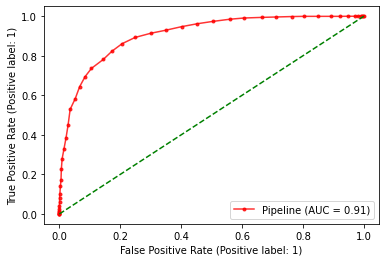

<AxesSubplot:>

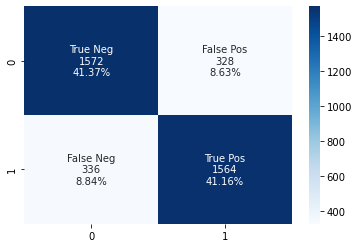

In [13]:
#4. print the classfication report
from sklearn.metrics import classification_report,auc,roc_auc_score,roc_curve,accuracy_score,confusion_matrix

cnf=confusion_matrix(y_test,y_pred)

print("Confusion Matrix \n",cnf,"\n")

clf=classification_report(y_test,y_pred)
print("Classification Report\n",clf)

%matplotlib inline 
import  matplotlib.pyplot as plt  

rfc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test, alpha=0.8,marker=".",
                                          color="red",
                                          response_method="auto")
plt.plot([0, 1], [0, 1], color="green", linestyle="--")
plt.show()


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cnf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cnf.flatten()/np.sum(cnf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf, annot=labels,fmt="", cmap='Blues')

**Exercise-2**

1. using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative..

**Note:**
- use CountVectorizer for pre-processing the text.
- use **KNN** as the classifier with n_neighbors of 10 and metric as 'euclidean'.
- print the classification report.

**References**:

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [14]:
#1. create a pipeline object
from sklearn.pipeline import Pipeline
model=Pipeline([
    ("count",CountVectorizer()),
    ("Knn",KNeighborsClassifier(n_neighbors=10,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='euclidean',
    metric_params=None,
    n_jobs=None))
])

#2. fit with X_train and y_train
model.fit(X_train,y_train)

Pipeline(steps=[('count', CountVectorizer()),
                ('Knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=10))])

Confusion Matrix 
 [[1215  685]
 [ 670 1230]] 

Classification Report
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      1900
           1       0.64      0.65      0.64      1900

    accuracy                           0.64      3800
   macro avg       0.64      0.64      0.64      3800
weighted avg       0.64      0.64      0.64      3800



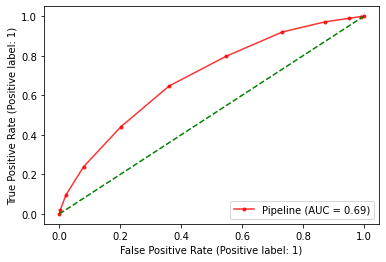

<AxesSubplot:>

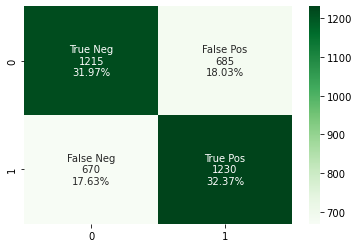

In [16]:
#3. get the predictions for X_test and store it in y_pred
y_pred_knn=model.predict(X_test)

#4. print the classfication report
from sklearn.metrics import auc,roc_auc_score,accuracy_score,confusion_matrix,classification_report
cnf=confusion_matrix(y_test,y_pred_knn)
print("Confusion Matrix \n",cnf,"\n")

clf=classification_report(y_test,y_pred_knn)
print("Classification Report\n",clf)

%matplotlib inline 
import  matplotlib.pyplot as plt  

rfc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test, alpha=0.8,marker=".",
                                          color="red",
                                          response_method="auto")
plt.plot([0, 1], [0, 1], color="green", linestyle="--")
plt.show()

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cnf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cnf.flatten()/np.sum(cnf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf, annot=labels,fmt="", cmap='Greens')

**Exercise-3**

1. using sklearn pipeline module create a classification pipeline to classify the movie review's positive or negative..

**Note:**
- use CountVectorizer for pre-processing the text.
- use **Multinomial Naive Bayes** as the classifier.
- print the classification report.

**References**:

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html



In [17]:
#1. create a pipeline object
model_ = Pipeline(
[
    ("count_vec",CountVectorizer()),
    ("MNb",MultinomialNB()),

])


#2. fit with X_train and y_train
model_nb=model_.fit(X_train,y_train)

Confusion Matrix 
 [[1647  253]
 [ 378 1522]] 

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      1900
           1       0.86      0.80      0.83      1900

    accuracy                           0.83      3800
   macro avg       0.84      0.83      0.83      3800
weighted avg       0.84      0.83      0.83      3800



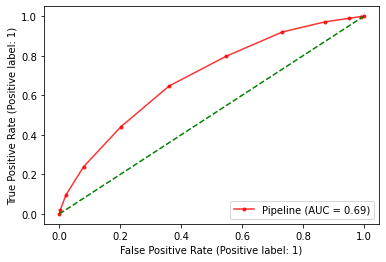

<AxesSubplot:>

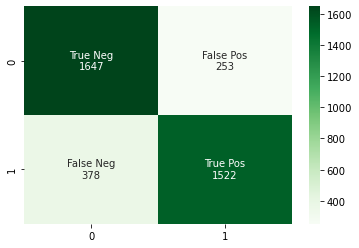

In [18]:
#3. get the predictions for X_test and store it in y_pred
y_pred_naive=model_nb.predict(X_test)

#4. print the classfication report
from sklearn.metrics import auc,roc_auc_score,accuracy_score,confusion_matrix,classification_report
cnf=confusion_matrix(y_test,y_pred_naive)
print("Confusion Matrix \n",cnf,"\n")

clf=classification_report(y_test,y_pred_naive)
print("Classification Report\n",clf)

%matplotlib inline 
import  matplotlib.pyplot as plt  

rfc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test, alpha=0.8,marker=".",
                                          color="red",
                                          response_method="auto")
plt.plot([0, 1], [0, 1], color="green", linestyle="--")
plt.show()

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cnf.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2,  in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf, annot=labels,fmt="", cmap='Greens')

### Can you write some observations of why model like KNN fails to produce good results unlike RandomForest and MultinomialNB?



- As Machine learning algorithms does not work on Text data directly, we need to convert them into numeric vector and feed that into models while training.
- In this process, we convert text into a very **high dimensional numeric vector** using the technique of Bag of words.
- Model like K-Nearest Neighbours(KNN) doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension. In higher dimensional space, the cost to calculate distance becomes expensive and hence impacts the performance of model.
- The easy calculation of probabilities for the words in corpus(Bag of words) and storing them in contigency table is the major reason for the Multinomial NaiveBayes to be a text classification friendly algorithm.
- As Random Forest uses Bootstrapping(Row and column Sampling) with many decision tree and overcomes the high variance and overfitting of high dimensional data and also uses feature importance of words for better classifing the categories.
- Machine Learning is like trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which give good results and satisfy the requirements like latency, interpretability etc.

Refer these resources to get good idea:
- https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
- https://analyticsindiamag.com/naive-bayes-why-is-it-favoured-for-text-related-tasks/

## [**Solution**](./bag_of_words_exercise_solutions.ipynb)